In [1]:
import pandas as pd

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from category_encoders import TargetEncoder
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor

In [2]:
df_1= pd.read_csv('/Users/hamzakhalil13/Desktop/Data2/2019_1.csv')
df_2 = pd.read_csv('/Users/hamzakhalil13/Desktop/Data2/2019_2.csv')
df_3 = pd.read_csv('/Users/hamzakhalil13/Desktop/Data2/2019_3.csv')
df_4 = pd.read_csv('/Users/hamzakhalil13/Desktop/Data2/2019_4.csv')
df_5 = pd.read_csv('/Users/hamzakhalil13/Desktop/Data2/2020_1.csv')
df_6 = pd.read_csv('/Users/hamzakhalil13/Desktop/Data2/2020_2.csv')
df_7 = pd.read_csv('/Users/hamzakhalil13/Desktop/Data2/2020_3.csv')
df_8 = pd.read_csv('/Users/hamzakhalil13/Desktop/Data2/2020_4.csv')
df_9 = pd.read_csv('/Users/hamzakhalil13/Desktop/Data2/2021_1.csv')
df_10 = pd.read_csv('/Users/hamzakhalil13/Desktop/Data2/2021_2.csv')
df_11= pd.read_csv('/Users/hamzakhalil13/Desktop/Data2/2021_3.csv')
df_12= pd.read_csv('/Users/hamzakhalil13/Desktop/Data2/2021_4.csv')
df_13= pd.read_csv('/Users/hamzakhalil13/Desktop/Data2/2022_1.csv')
df_14= pd.read_csv('/Users/hamzakhalil13/Desktop/Data2/2022_2.csv')











df = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,df_13,df_14]
df = pd.concat(df)
df

,ITIN_ID,YEAR,QUARTER,ORIGIN_STATE_NM,DEST_STATE_NM,TICKET_CARRIER,PASSENGERS,MARKET_FARE,NONSTOP_MILES,OP_CARRIER_GROUP
0,201912,2019,1,Pennsylvania,Georgia,DL,1.0,36.0,692.0,NaN
1,201913,2019,1,Pennsylvania,Georgia,DL,1.0,143.0,692.0,NaN
2,201914,2019,1,Pennsylvania,Georgia,DL,1.0,203.0,692.0,NaN
3,201915,2019,1,Pennsylvania,Georgia,DL,1.0,211.0,692.0,NaN
4,201916,2019,1,Pennsylvania,Georgia,DL,1.0,241.0,692.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2097147,202221881608,2022,2,Massachusetts,Iowa,DL,1.0,236.5,1165.0,NaN
2097148,202221881608,2022,2,Iowa,Massachusetts,DL,1.0,236.5,1165.0,NaN
2097149,202221881609,2022,2,Massachusetts,Iowa,DL,1.0,285.0,1165.0,NaN
2097150,202221881609,2022,2,Iowa,Massachusetts,DL,1.0,285.0,1165.0,NaN


In [3]:
df = df.drop(columns=['ITIN_ID', 'OP_CARRIER_GROUP'])
df

,YEAR,QUARTER,ORIGIN_STATE_NM,DEST_STATE_NM,TICKET_CARRIER,PASSENGERS,MARKET_FARE,NONSTOP_MILES
0,2019,1,Pennsylvania,Georgia,DL,1.0,36.0,692.0
1,2019,1,Pennsylvania,Georgia,DL,1.0,143.0,692.0
2,2019,1,Pennsylvania,Georgia,DL,1.0,203.0,692.0
3,2019,1,Pennsylvania,Georgia,DL,1.0,211.0,692.0
4,2019,1,Pennsylvania,Georgia,DL,1.0,241.0,692.0
...,...,...,...,...,...,...,...,...
2097147,2022,2,Massachusetts,Iowa,DL,1.0,236.5,1165.0
2097148,2022,2,Iowa,Massachusetts,DL,1.0,236.5,1165.0
2097149,2022,2,Massachusetts,Iowa,DL,1.0,285.0,1165.0
2097150,2022,2,Iowa,Massachusetts,DL,1.0,285.0,1165.0


In [4]:
Q1 = df['MARKET_FARE'].quantile(0.25)
Q1

# # # Calculate Q3
Q3 = df['MARKET_FARE'].quantile(0.75)
Q3
# # # Define the Inter Quartile Range (IQR)
IQR = Q3 - Q1
IQR
# # # Make select condition for the values that fall below the Q1 - 1.5*IQR
outliers_below = df['MARKET_FARE'] < (Q1 - 1.5 * IQR)

# # # Make select condition for the values that fall above the Q3 - 1.5*IQR
outliers_above = df['MARKET_FARE'] > (Q3 + 1.5 * IQR)
outliers_above
# # # Select the INVERSE of the selection
df = df[ ~(outliers_above | outliers_below) ]
df.shape

(28970727, 8)

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size = 0.70, test_size = 0.30, random_state=42)

train, val = train_test_split(train, train_size = 0.50, test_size = 0.50, random_state=42)

train.shape, val.shape, test.shape

((10139754, 8), (10139754, 8), (8691219, 8))

In [6]:
target = ['MARKET_FARE']
features = df.columns.drop(target)

x_train = train[features]
y_train = train[target]

x_val = val[features]
y_val = val[target]

x_test = test[features]
y_test = test[target]

#x_pickle_data = pickle_data[features]
#y_pickle_data = pickle_data[target]
     

In [7]:
pipeline = make_pipeline(
    OrdinalEncoder(),
    RandomForestRegressor(max_depth=20, n_estimators=20)
)

pipeline.fit(x_train, y_train)
    

/Users/hamzakhalil13/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['ORIGIN_STATE_NM', 'DEST_STATE_NM',
                                      'TICKET_CARRIER'],
                                mapping=[{'col': 'ORIGIN_STATE_NM',
                                          'data_type': dtype('O'),
                                          'mapping': Georgia                                            1
Florida                                            2
Oregon                                             3
Maryland                                           4
Washington                                         5
Wisconsin                                          6
Texas                                              7
North Carolina                                     8
South Carolina                                     9
Pennsylvania                                      10
California                                        11
New York                                          12
Virginia  

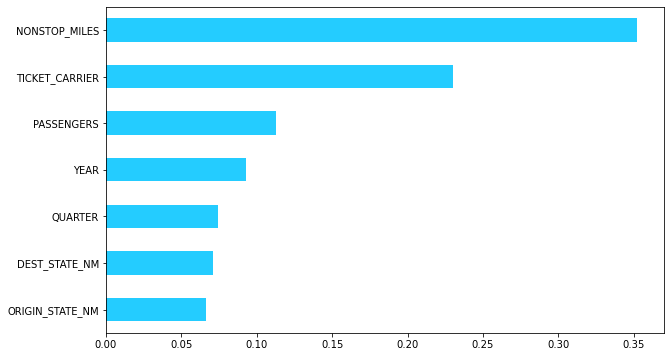

In [8]:
model = pipeline.named_steps['randomforestregressor']
importances = pd.Series(model.feature_importances_, features)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

#plt.title('Feature Importances for 2018 Flights Data (Target: PricePerTicket)')
n=12
importances.sort_values()[-n:].plot.barh(color='#24ccff');

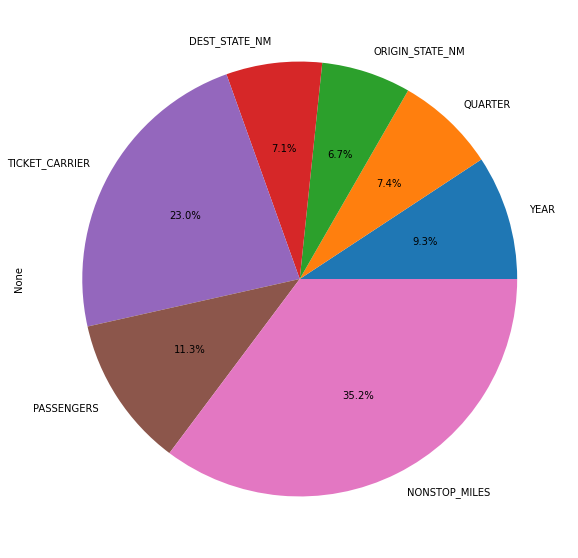

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
importances.plot.pie(autopct='%1.1f%%')